In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

# **DataSet**

In [99]:
df = pd.read_csv('vehicles.csv')
df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,14.167143,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,27.046364,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,11.018889,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,27.046364,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,15.658421,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47070,13.523182,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
47071,12.935217,0.0,0.0,0.0,20,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
47072,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
47073,14.167143,0.0,0.0,0.0,18,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [100]:
df.shape

(47075, 84)

## **Separation of Countinous Variable Column and Categorical Variables**

In [101]:
df_num = df.select_dtypes(include=[np.number])

## **Countinous Variable Columns**

In [102]:
df_num.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore',
       'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U',
       'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4',
       'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy',
       'rangeHwyA', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'year',
       'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy', 'phevComb'],
      dtype='object')

In [103]:
df_cat = df.select_dtypes(include=['object'])

## **Categorical Variable Columns**

In [104]:
df_cat.columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'baseModel', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn',
       'startStop'],
      dtype='object')

# **IMPUTATION - Finding The Null Values**

In [105]:
df_num.isnull().sum()

barrels08            0
barrelsA08           0
charge120            0
charge240            0
city08               0
city08U              0
cityA08              0
cityA08U             0
cityCD               0
cityE                0
cityUF               0
co2                  0
co2A                 0
co2TailpipeAGpm      0
co2TailpipeGpm       0
comb08               0
comb08U              0
combA08              0
combA08U             0
combE                0
combinedCD           0
combinedUF           0
cylinders          652
displ              650
engId                0
feScore              0
fuelCost08           0
fuelCostA08          0
ghgScore             0
ghgScoreA            0
highway08            0
highway08U           0
highwayA08           0
highwayA08U          0
highwayCD            0
highwayE             0
highwayUF            0
hlv                  0
hpv                  0
id                   0
lv2                  0
lv4                  0
pv2                  0
pv4        

# **Repalcing Null Values With Median or Dropping The Vales if there are more null vales in the columns**

In [106]:
df_num_median = df_num['cylinders'].median()
df_num['cylinders'] = df_num['cylinders'].fillna(df_num_median)

In [107]:
df_num_median = df_num['displ'].median()
df_num['displ'] = df_num['displ'].fillna(df_num_median)

In [108]:
df_num.isnull().sum()

barrels08          0
barrelsA08         0
charge120          0
charge240          0
city08             0
city08U            0
cityA08            0
cityA08U           0
cityCD             0
cityE              0
cityUF             0
co2                0
co2A               0
co2TailpipeAGpm    0
co2TailpipeGpm     0
comb08             0
comb08U            0
combA08            0
combA08U           0
combE              0
combinedCD         0
combinedUF         0
cylinders          0
displ              0
engId              0
feScore            0
fuelCost08         0
fuelCostA08        0
ghgScore           0
ghgScoreA          0
highway08          0
highway08U         0
highwayA08         0
highwayA08U        0
highwayCD          0
highwayE           0
highwayUF          0
hlv                0
hpv                0
id                 0
lv2                0
lv4                0
pv2                0
pv4                0
range              0
rangeCity          0
rangeCityA         0
rangeHwy     

# **Correlationship of 'Fuelcost08' label**

In [109]:
df_num_corr = df_num.corr()

In [110]:
df_num_corr['fuelCost08']

barrels08          0.896425
barrelsA08         0.037270
charge120               NaN
charge240         -0.277031
city08            -0.619022
city08U           -0.408385
cityA08           -0.072389
cityA08U          -0.075857
cityCD             0.002539
cityE             -0.212248
cityUF            -0.067456
co2                0.009157
co2A               0.013409
co2TailpipeAGpm    0.057514
co2TailpipeGpm     0.902229
comb08            -0.660271
comb08U           -0.401372
combA08           -0.069137
combA08U          -0.073657
combE             -0.219053
combinedCD         0.003630
combinedUF        -0.066422
cylinders          0.739967
displ              0.738853
engId             -0.062961
feScore           -0.371680
fuelCost08         1.000000
fuelCostA08        0.056624
ghgScore          -0.371119
ghgScoreA         -0.021783
highway08         -0.699962
highway08U        -0.381142
highwayA08        -0.063966
highwayA08U       -0.070126
highwayCD          0.005968
highwayE          -0

In [111]:
fuel_economy = []
fuel_economy.extend(df_num_corr[(df_num_corr['fuelCost08']>0.3)].index.values)
fuel_economy.extend(df_num_corr[(df_num_corr['fuelCost08']<-0.3)].index.values)

## **Removing Outliers Rows of label value**

In [112]:
fuel_economy

['barrels08',
 'co2TailpipeGpm',
 'cylinders',
 'displ',
 'fuelCost08',
 'city08',
 'city08U',
 'comb08',
 'comb08U',
 'feScore',
 'ghgScore',
 'highway08',
 'highway08U',
 'UCity',
 'UHighway',
 'youSaveSpend']

In [113]:
df_num_fil = df_num[fuel_economy]
df_num_fil

,barrels08,co2TailpipeGpm,cylinders,displ,fuelCost08,city08,city08U,comb08,comb08U,feScore,ghgScore,highway08,highway08U,UCity,UHighway,youSaveSpend
0,14.167143,423.190476,4.0,2.0,2500,19,0.0,21,0.0,-1,-1,25,0.0,23.3333,35.0000,-3250
1,27.046364,807.909091,12.0,4.9,4750,9,0.0,11,0.0,-1,-1,14,0.0,11.0000,19.0000,-14500
2,11.018889,329.148148,4.0,2.2,1950,23,0.0,27,0.0,-1,-1,33,0.0,29.0000,47.0000,-500
3,27.046364,807.909091,8.0,5.2,4750,10,0.0,11,0.0,-1,-1,12,0.0,12.2222,16.6667,-14500
4,15.658421,467.736842,4.0,2.2,3450,17,0.0,19,0.0,-1,-1,23,0.0,21.0000,32.0000,-8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47070,13.523182,403.954545,4.0,2.2,2350,19,0.0,22,0.0,-1,-1,26,0.0,24.0000,37.0000,-2500
47071,12.935217,386.391304,4.0,2.2,2250,20,0.0,23,0.0,-1,-1,28,0.0,25.0000,39.0000,-2000
47072,14.167143,423.190476,4.0,2.2,2500,18,0.0,21,0.0,-1,-1,24,0.0,23.0000,34.0000,-3250
47073,14.167143,423.190476,4.0,2.2,2500,18,0.0,21,0.0,-1,-1,24,0.0,23.0000,34.0000,-3250


## **Removing the data points which are more than 75% and less than 25%**

In [114]:
df_num_fil['fuelCost08'].describe()

count    47075.000000
mean      2919.360595
std        856.481562
min        550.000000
25%       2350.000000
50%       2900.000000
75%       3450.000000
max       9450.000000
Name: fuelCost08, dtype: float64

In [115]:
df_FC08=df_num_fil[(df_num_fil['fuelCost08']>2350)&(df_num_fil['fuelCost08']<3450)]

## **Plotting Boxplot after Removal**

<Axes: ylabel='fuelCost08'>

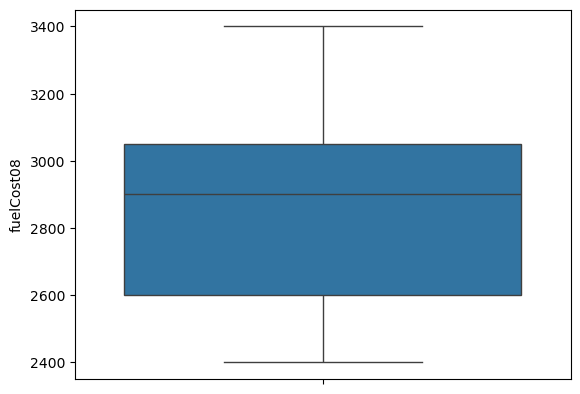

In [116]:
sns.boxplot(y=df_FC08['fuelCost08'])

In [117]:
df_FC08.shape

(20834, 16)

## **Remove the data points which are more thatn 75% and less than 25%**

In [118]:
df_FC08['barrels08'].describe()

count    20834.000000
mean        15.123124
std          2.033122
min          0.081083
25%         14.167143
50%         14.875500
75%         16.528333
max         18.594375
Name: barrels08, dtype: float64

In [119]:
df_FC08['cylinders'].describe()

count    20834.000000
mean         5.526351
std          1.234398
min          2.000000
25%          4.000000
50%          6.000000
75%          6.000000
max          8.000000
Name: cylinders, dtype: float64

In [120]:
df_FC08['displ'].describe()

count    20834.000000
mean         3.138826
std          0.965087
min          1.000000
25%          2.400000
50%          3.000000
75%          3.700000
max          6.200000
Name: displ, dtype: float64

In [121]:
df_FC08['city08'].describe()

count    20834.000000
mean        17.673514
std          2.372676
min         10.000000
25%         16.000000
50%         17.000000
75%         19.000000
max         28.000000
Name: city08, dtype: float64

In [122]:
df_FC08['city08U'].describe()

count    20834.000000
mean         6.875694
std          9.230153
min          0.000000
25%          0.000000
50%          0.000000
75%         17.527200
max         28.046100
Name: city08U, dtype: float64

In [123]:
df_FC08['comb08'].describe()

count    20834.000000
mean        20.015216
std          2.638513
min         13.000000
25%         18.000000
50%         20.000000
75%         21.000000
max         28.000000
Name: comb08, dtype: float64

In [124]:
df_FC08['comb08U'].describe()

count    20834.000000
mean         7.808366
std         10.474486
min          0.000000
25%          0.000000
50%          0.000000
75%         20.054300
max         28.227100
Name: comb08U, dtype: float64

## **Plotting Boxplot after Removal**

In [125]:
df_COM=df_FC08[(df_FC08['comb08U']>0)&(df_FC08['comb08U']<20.05)]

<Axes: ylabel='comb08U'>

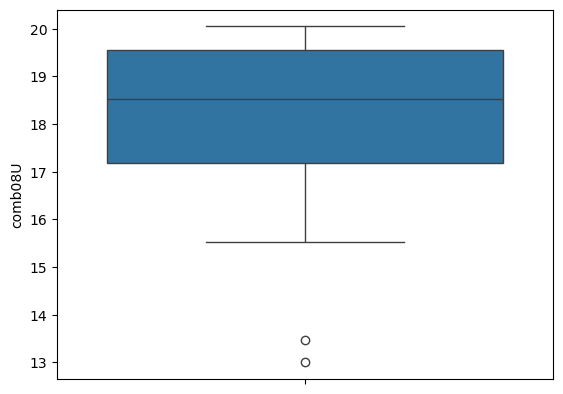

In [126]:
sns.boxplot(y=df_COM['comb08U'])

In [127]:
df_COM.shape

(2352, 16)

# **Removing the datapoints which are more than 75% and less than 25%**

In [128]:
df_COM['feScore'].describe()

count    2352.000000
mean        2.753401
std         1.884249
min        -1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: feScore, dtype: float64

In [129]:
df_COM['ghgScore'].describe()

count    2352.000000
mean        2.755102
std         1.884922
min        -1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         7.000000
Name: ghgScore, dtype: float64

In [130]:
df_COM['highway08'].describe()

count    2352.000000
mean       22.101616
std         2.101296
min        16.000000
25%        21.000000
50%        22.000000
75%        24.000000
max        27.000000
Name: highway08, dtype: float64

In [131]:
df_COM.shape

(2352, 16)

#  **Standard Scaler**

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
sc = StandardScaler()

In [134]:
sco = sc.fit(df_COM)

In [135]:
standard_num_scaled = sco.fit_transform(df_COM)

<Axes: >

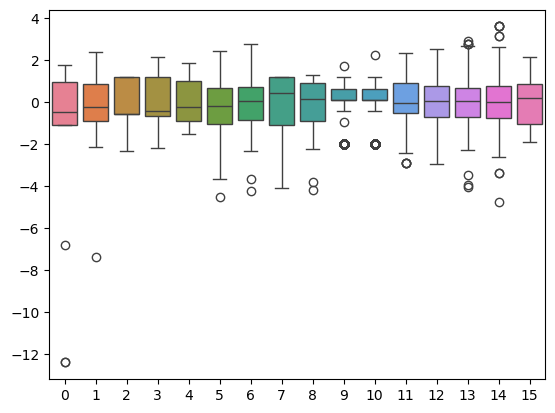

In [136]:
sns.boxplot(standard_num_scaled)

In [137]:
from sklearn.preprocessing import MinMaxScaler

In [138]:
mms = MinMaxScaler()

In [139]:
min_num_scaled = mms.fit_transform(df_COM)

<Axes: >

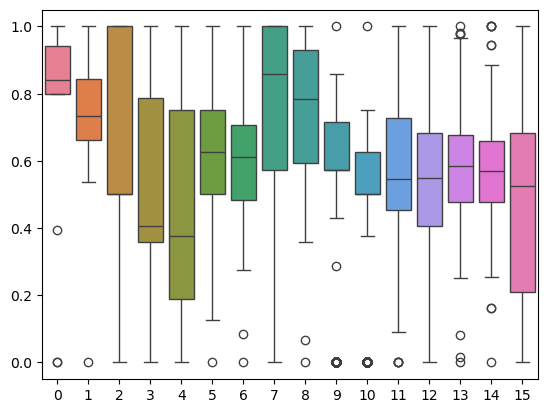

In [140]:
sns.boxplot(min_num_scaled)

## **Categorical Variable Columns**

In [141]:
df_cat.columns

Index(['drive', 'eng_dscr', 'fuelType', 'fuelType1', 'make', 'model',
       'mpgData', 'trany', 'VClass', 'baseModel', 'guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'c240bDscr', 'createdOn', 'modifiedOn',
       'startStop'],
      dtype='object')

## **Finding Null values in Categorical variables**

In [142]:
df_cat.isnull().sum()

drive          1186
eng_dscr      17306
fuelType          0
fuelType1         0
make              0
model             0
mpgData         236
trany            11
VClass            0
baseModel         0
guzzler       44322
trans_dscr    32031
tCharger      36954
sCharger      46072
atvType       41979
fuelType2     45184
rangeA        45189
evMotor       44858
mfrCode       30808
c240Dscr      46934
c240bDscr     46940
createdOn         0
modifiedOn        0
startStop     31689
dtype: int64

## **Repalcing NUll vales with Mode or Dropping the values if there are more null values in the columns**

In [143]:
df_cat.drop(['eng_dscr','guzzler', 'trans_dscr',
       'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA', 'evMotor',
       'mfrCode', 'c240Dscr', 'c240bDscr',
       'startStop'],axis=1,inplace=True)

In [144]:
df_cat['drive'].fillna(df_cat['drive'].value_counts().idxmax(), inplace=True)

In [145]:
df_cat['mpgData'].fillna(df_cat['mpgData'].value_counts().idxmax(), inplace=True)

In [146]:
df_cat['trany'].fillna(df_cat['trany'].value_counts().idxmax(), inplace=True)

In [147]:
df_cat.isnull().sum()

drive         0
fuelType      0
fuelType1     0
make          0
model         0
mpgData       0
trany         0
VClass        0
baseModel     0
createdOn     0
modifiedOn    0
dtype: int64

## **Checking Unoque Values**

In [148]:
df_cat[['drive', 'fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany',
       'VClass', 'baseModel', 'createdOn', 'modifiedOn']].nunique()

drive            7
fuelType        14
fuelType1        6
make           144
model         4941
mpgData          2
trany           40
VClass          34
baseModel     1442
createdOn      449
modifiedOn     289
dtype: int64

In [149]:
df_cat.columns

Index(['drive', 'fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany',
       'VClass', 'baseModel', 'createdOn', 'modifiedOn'],
      dtype='object')

# **Label Encoding**

In [150]:
from sklearn.preprocessing import LabelEncoder

In [151]:
le = LabelEncoder()

In [152]:
df_cat = df_cat [['drive', 'fuelType', 'fuelType1', 'make', 'model', 'mpgData', 'trany',
       'VClass', 'baseModel', 'createdOn', 'modifiedOn']]

In [153]:
df_cat = df_cat.apply(le.fit_transform)

In [154]:
df_cat.shape

(47075, 11)

In [155]:
df_COM.shape

(2352, 16)

In [156]:
df_cat = df_cat.loc[df_COM.index.values,:]

In [157]:
df_cat.shape

(2352, 11)

In [158]:
d1 = pd.DataFrame(standard_num_scaled, columns=df_num_fil.columns)

In [159]:
d1.reset_index(inplace=True)

In [160]:
df_cat.reset_index(inplace=True)

In [161]:
df_Final = pd.concat([d1, df_cat], axis=1)

# **Final Dataset**

In [162]:
df_Final

,index,barrels08,co2TailpipeGpm,cylinders,displ,fuelCost08,city08,city08U,comb08,comb08U,...,fuelType,fuelType1,make,model,mpgData,trany,VClass,baseModel,createdOn,modifiedOn
0,0,0.215967,0.206996,-0.548492,-1.135140,-0.234392,-0.159667,-0.396597,-0.297592,-0.488768,...,11,5,140,4697,1,21,21,1382,254,235
1,1,1.237896,0.633240,-0.548492,-1.135140,1.675388,0.711650,0.731617,1.207648,1.289562,...,1,0,6,3335,1,21,21,987,254,17
2,2,1.237896,0.633240,-0.548492,-1.135140,1.675388,0.711650,0.731617,1.207648,1.289562,...,1,0,139,4309,0,21,21,1263,254,17
3,3,-1.052667,-1.170470,-0.548492,-1.135140,1.463190,0.711650,0.470255,1.207648,1.234998,...,7,4,6,3674,0,22,28,1093,254,167
4,4,-0.451735,-0.517986,-0.548492,-1.135140,-0.870985,-0.159667,-0.226711,0.455028,0.226571,...,11,5,140,3728,0,21,2,1099,254,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,2347,1.801758,1.972422,1.235815,1.220218,1.250993,-1.030985,-1.408765,-1.802832,-1.950235,...,11,5,42,4832,0,26,27,1410,111,76
2348,2348,0.962221,0.772738,-0.548492,-0.111071,0.402201,-0.159667,-0.250495,-1.050212,-0.953734,...,11,5,133,291,0,20,27,71,111,76
2349,2349,0.962221,0.912236,-0.548492,-0.111071,0.402201,-0.159667,-0.311393,-1.050212,-1.062239,...,11,5,133,291,0,20,27,71,111,76
2350,2350,1.801758,1.470229,-2.332799,-1.442361,1.250993,-0.159667,0.212900,-1.802832,-1.503431,...,11,5,24,1383,0,32,10,375,111,76


In [163]:
Y = df_Final['fuelCost08']

In [164]:
X = df_Final.drop(['fuelCost08'], axis=1)

# **Splitting the Data for Training (70%) and Testing (30%)**

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)

## **LinearRegression Training Score**

In [166]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lm = lr_model.fit(X_train, y_train)
lm.score(X_train, y_train)

0.9959723208491762

## **DecisionTreeRegressor Training Score**

In [167]:
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
dt1 = dtr_model.fit(X_train, y_train)
dt1.score(X_train, y_train)

1.0

## **RandomForesrRegressor Training Score**

In [168]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=50, max_depth=3)
rf1 = rf_model.fit(X_train, y_train)
rf1.score(X_train, y_train)

0.9930451424393816

# **Model Validation**

In [169]:
from sklearn.metrics import accuracy_score, r2_score

## **LinearRegression Testing score**

In [170]:
lm_y_pred = lm.predict(X_test)
r2_score(y_test, lm_y_pred)

0.9979848012340725

## **DecisionTreeRegressor Testing Score**

In [171]:
dt_y_pred = dt1.predict(X_test)
r2_score(y_test, dt_y_pred)

1.0

## **RandomForestRegressor Testing Score**

In [172]:
rf_y_pred = rf1.predict(X_test)
r2_score(y_test, rf_y_pred)

0.9983035384533935